In [1]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv",na_values=" ?")

# Se etiquetan las columnas para poder interpretar más fácilmente los datos.
# Cada fila es un ejemplo, cada columna un atributo.
# La columna llamada C es el atributo a predecir

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### CONOCIMIENTO DE LOS DATOS

In [2]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = data.shape
shape


(7043, 21)

In [3]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
# Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.
max(data.isnull().sum(axis=1))

0

In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:


# Dividir los atributos en numéricos y categóricos
atributos_numericos = data.select_dtypes(include=['int'])
atributos_categoricos = data.select_dtypes(include=['object'])

# Calcular medidas de centralidad y dispersión para atributos numéricos
centralidad_numericos = atributos_numericos.describe()
dispersion_numericos = atributos_numericos.var()

# Calcular medidas de centralidad y dispersión para atributos categóricos
centralidad_categoricos = atributos_categoricos.describe()
# No se calcula dispersión para atributos categóricos, ya que no tienen una escala numérica

# Imprimir resultados
print("Medidas de centralidad para atributos numéricos:")
print(centralidad_numericos)

print("\nVarianza para atributos numéricos:")
print(dispersion_numericos)

print("\nMedidas de centralidad para atributos categóricos:")
print(centralidad_categoricos)




Medidas de centralidad para atributos numéricos:
       SeniorCitizen       tenure
count    7043.000000  7043.000000
mean        0.162147    32.371149
std         0.368612    24.559481
min         0.000000     0.000000
25%         0.000000     9.000000
50%         0.000000    29.000000
75%         0.000000    55.000000
max         1.000000    72.000000

Varianza para atributos numéricos:
SeniorCitizen      0.135875
tenure           603.168108
dtype: float64

Medidas de centralidad para atributos categóricos:
        customerID gender Partner Dependents PhoneService MultipleLines   
count         7043   7043    7043       7043         7043          7043  \
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection   
count             7043           7043  

In [7]:
data.mode()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Male,0.0,No,No,1.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,20.05,,No
1,0003-MKNFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.2,NaN
2,0004-TLHLJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0011-IGKFF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0013-EXCHZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7039,9992-RRAMN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7040,9992-UJOEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7041,9993-LHIEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

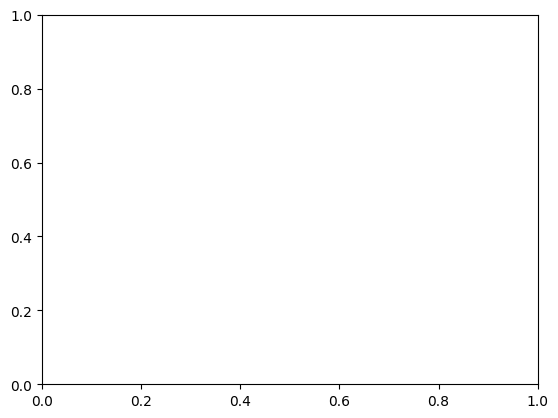

In [8]:
# Diagrama de cajas y bigotes para atributos numéricos
# Permite identificar la existencia de datos atípicos

plt.boxplot((data['Partner'],data['SeniorCitizen'],data['Dependents'],data['tenure'], data['PhoneService'],
             data['MultipleLines'],data['InternetService'],data['OnlineSecurity'],data['OnlineBackup'],data['DeviceProtection'], data['TechSupport'],
                data['StreamingTV'],data['StreamingMovies'],data['Contract'],data['OnlineBackup'],data['PaperlessBilling'],
                 ))

plt.show()

In [ ]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

cols = ['gender','SeniorCitizen',"Partner","Dependents"]
numerical = cols

plt.figure(figsize=(20,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=data)
    ax.set_title(f"{col}")

In [ ]:
cols = ['gender','SeniorCitizen',"Partner","Dependents"]

plt.figure(figsize=(14,4))


for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x="Churn", hue=str(col), data=data)
    
    # Calcula porcentajes y añade etiquetas
    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100 * height/total),
                ha="center")

    ax.set_title(f"{col}")
    
plt.tight_layout()
plt.show()

In [ ]:
cols = ['PhoneService','InternetService',"TechSupport","OnlineBackup","Contract"]

plt.figure(figsize=(14,5))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x="Churn", hue=str(col), data=data)
    
    # Calcula porcentajes y añade etiquetas
    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100 * height/total),
                ha="center")

    ax.set_title(f"{col}")
    
plt.tight_layout()
plt.show()

In [ ]:
cols = ['PaymentMethod',"PaperlessBilling","OnlineBackup","Contract"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x="Churn", hue=str(col), data=data)
    
    # Calcula porcentajes y añade etiquetas
    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100 * height/total),
                ha="center")

    ax.set_title(f"{col}")
    
plt.tight_layout()
plt.show()

In [ ]:
# No encontramos (en la base trabajada) datos faltantes [aparentemente] - nonetheless...: eliminamosfilas y columnas según lo observado.

# Se borran por que aportan en nada al analisis
data.drop("customerID", axis=1, inplace=True)
data.drop("gender", axis=1, inplace=True)

### PREPARACIóN DE LOS DATOS

In [ ]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['Churn'].value_counts())

In [ ]:
print(data['MultipleLines'].value_counts())

In [ ]:
# Se procesan las variables numericas 

data['TotalCharges'].fillna( data['TotalCharges'].median(), inplace=True)

data['MonthlyCharges'].fillna(data['MonthlyCharges'].median(), inplace=True)

In [ ]:
# Se procesan las variables categoricas
data['MultipleLines'].replace(to_replace='No phone service',  value='No', inplace=True)

data['OnlineSecurity'].replace(to_replace='No internet service',  value='No', inplace=True)
data['OnlineBackup'].replace(to_replace='No internet service',  value='No', inplace=True)
data['DeviceProtection'].replace(to_replace='No internet service',  value='No', inplace=True)
data['TechSupport'].replace(to_replace='No internet service',  value='No', inplace=True)
data['StreamingTV'].replace(to_replace='No internet service',  value='No', inplace=True)

data['StreamingMovies'].replace(to_replace='No internet service',  value='No', inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder 

# Se convierten los atributos categóricos a valores numéricos
labelencoder= LabelEncoder() 
data['MultipleLines'] = labelencoder.fit_transform(data['MultipleLines'])
data['Partner'] = labelencoder.fit_transform(data['Partner'])
data['Dependents'] = labelencoder.fit_transform(data['Dependents'])
data['PhoneService'] = labelencoder.fit_transform(data['PhoneService'])
data['PaperlessBilling'] = labelencoder.fit_transform(data['PaperlessBilling'])
data['Churn'] = labelencoder.fit_transform(data['Churn'])
data['OnlineSecurity'] = labelencoder.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = labelencoder.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = labelencoder.fit_transform(data['DeviceProtection'])
data['TechSupport'] = labelencoder.fit_transform(data['TechSupport'])
data['StreamingTV'] = labelencoder.fit_transform(data['StreamingTV'])
# Aunque son categoricas se pasan a binario
data['PaymentMethod'] = labelencoder.fit_transform(data['PaymentMethod'])
data['Contract'] = labelencoder.fit_transform(data['Contract'])
data['InternetService'] = labelencoder.fit_transform(data['InternetService'])

data['StreamingMovies'] = labelencoder.fit_transform(data['StreamingMovies'])
data.head()

In [ ]:

variables_entrada = ['MultipleLines', 'Partner', 'Dependents', 'PhoneService',
                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                     'InternetService',  'Contract',  'PaymentMethod',
                     'StreamingMovies', 'StreamingTV','Churn']
matriz_correlacion = data[variables_entrada].corr()

# Graficamos la matriz de correlación
plt.figure(figsize=(9, 4))
sns.heatmap(matriz_correlacion, annot=True, cbar=False, cmap="Blues")
plt.title("Matriz de Correlación")
plt.show()

Se eliminan las variables categoricas para el modelo

# Prueba de modelado

**Consideramos que las dos hipótesis a trabajar serán:**

* Regresión logística
Hipótesis_1: La antigüedad del cliente (tenure) tiene una relación directa con la probabilidad de abandono. Los clientes nuevos son más propensos a abandonar que los que llevan más tiempo con la compañía.

Este se utiliza como modelo base con efectos de comparación.


* Random forest
Hipótesis_2: La combinación de características como el tipo de contrato, la antigüedad y los servicios adicionales (como StreamingTV o TechSupport) pueden predecir con precisión la probabilidad de abandono.

Esta es una muy buena opción toda vez que, estos modelos son los mejores para trabajo con datos tabulares (categóricos y numéricos) y con datos desbalanceados. En este caso se estima una precisiónd del 1.0.


Los que NO utilizaremos:

* Redes neuronales: no son buenas para resolver datos tabulares.

* SVM: no se utilizó dado que los dos modelos usados ofrecen mejor precisión desde nuestra práctica.



In [ ]:
data_model_logis= data.copy()

data_model_logis = data_model_logis.drop(['TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)

data_model_logis.head()

In [ ]:
# Se hace balanceo de clases eliminando ejemplos de la clase mayoritaria
g = data_model_logis.groupby('Churn')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal

In [ ]:
y = dataBal['Churn'].values
X = dataBal.drop(columns = ['Churn'])

In [ ]:
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils.extmath import randomized_range_finder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, dataBal.Churn, test_size=0.30)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

In [ ]:
# Entrenamiento del modelo de clasificación por regresión logística

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)

In [ ]:
# Aplicación del modelo construido a los datos de test
predictions = logisticRegr.predict(X_test)
predictions

In [ ]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

In [ ]:
# To get the weights of all the variables
weights = pd.Series(logisticRegr.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

### EVALUACIÓN DEL MODELO
**“N-folds validation”** con N=10 y **“random subsampling”** utilizando una partición 70/30.

+ Matriz de confusión.

+ Accuracy.

+ Sensitivity o Recall.

+ Specificity.

+ Precision.

+ F1-score.

In [ ]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Convertir el DataFrame a una matriz NumPy
X = dataBal.drop('Churn', axis=1).to_numpy()
y = dataBal['Churn'].to_numpy()

# N-folds validation con N=10
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Listas para almacenar las métricas
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Crear y entrenar el modelo de regresión logística
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(cm)

In [ ]:
# Calcula las métricas promedio para el esquema de validación de N-folds
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_cm = np.mean(confusion_matrices, axis=0)

print("Resultados para N-folds validation:")
print("Accuracy:", avg_accuracy)
print("Precision:", avg_precision)
print("Recall:", avg_recall)
print("F1-score:", avg_f1)

In [ ]:
#Visualize confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, cbar=False, cmap="Blues", annot_kws={'size':15}, fmt=".4g")
plt.title("Confusion Matrix", fontsize=20)
plt.xlabel("Predicted Label", fontsize=20)
plt.ylabel("True Label", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Ahora aplicamos Random Forest como prueba

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Churn', axis=1), data.Churn, test_size=0.30)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

In [ ]:
# Encuentra cuáles columnas tienen espacios en blanco
for col in data.columns:
    if data[col].dtype == 'object':  # Asumiendo que los espacios están en columnas de tipo 'object'
        if (data[col] == ' ').any():
            print(f"Espacio encontrado en la columna {col}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Crear una instancia del clasificador Random Forest
random_forest = RandomForestClassifier(n_estimators=500, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
random_forest.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')



In [ ]:
from sklearn.metrics import roc_curve, auc

# Calcula las tasas de verdaderos y falsos positivos
fpr, tpr, thresholds = roc_curve(y_test, random_forest.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

sns.heatmap(df_report.iloc[:-1, :].T, annot=True)
plt.title("Reporte de Clasificación")

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, random_forest.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall')
plt.show()

In [ ]:

feature_importances = pd.Series(random_forest.feature_importances_, index=X_train.columns)
feature_importances.nlargest(33).plot(kind='barh')
plt.title('Importancia de las Características')

# Fin del programa!!!